## Objetivos

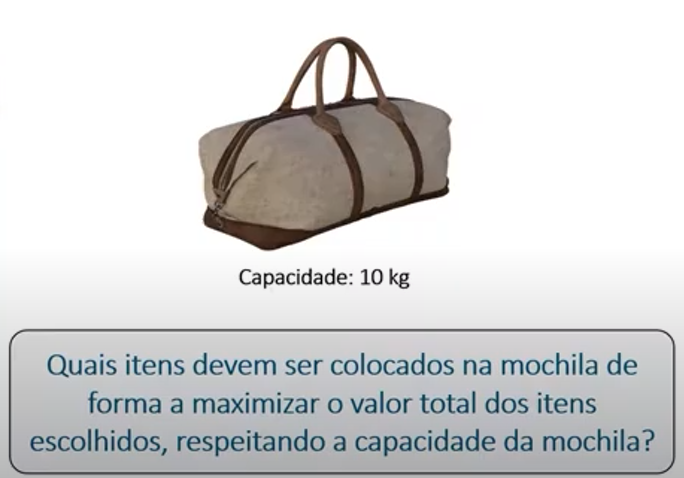

In [1]:
from IPython.display import Image
Image(filename=r'..\images\exemplo_01.png', width=600) 

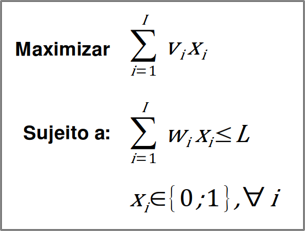

In [2]:
Image(filename=r'..\images\exemplo_01_2.png', width=600)

### Imports

In [3]:
import gurobipy as gp
import pandas as pd

### Carregando Dados

In [4]:
dados = pd.read_csv(r'..\dados\exemplo_01.csv', sep=';')
dados['Item'] = dados['Item'].apply(lambda x: 'Item'+str(x))
dados

,Item,Peso,Valor
0,Item1,65,455
1,Item2,94,691
2,Item3,119,833
3,Item4,59,425
4,Item5,149,1064
5,Item6,114,758
6,Item7,57,419
7,Item8,136,914
8,Item9,100,651
9,Item10,150,966


### Setando os parâmetros

In [5]:
qtd_itens = 15
capacidade = 1000

# Criando dicionáios item - peso e item - valor
itens = dados.Item.to_list()
pesos = dict(zip(dados.Item, dados.Peso))
valores = dict(zip(dados.Item, dados.Valor))

In [6]:
pesos

{'Item1': 65,
 'Item2': 94,
 'Item3': 119,
 'Item4': 59,
 'Item5': 149,
 'Item6': 114,
 'Item7': 57,
 'Item8': 136,
 'Item9': 100,
 'Item10': 150,
 'Item11': 122,
 'Item12': 117,
 'Item13': 120,
 'Item14': 130,
 'Item15': 133}

In [7]:
valores

{'Item1': 455,
 'Item2': 691,
 'Item3': 833,
 'Item4': 425,
 'Item5': 1064,
 'Item6': 758,
 'Item7': 419,
 'Item8': 914,
 'Item9': 651,
 'Item10': 966,
 'Item11': 828,
 'Item12': 827,
 'Item13': 857,
 'Item14': 837,
 'Item15': 894}

### Criando o modelo

In [8]:
modelo = gp.Model('otimizador_mochila')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-04-12


### Inserindo as variáveis de decisão

In [9]:
x = modelo.addVars(itens, vtype=gp.GRB.BINARY)

### Função Objetivo e Restrições

In [10]:
modelo.setObjective(
    gp.quicksum(x[i] * valores[i] for i in itens),
    sense = gp.GRB.MAXIMIZE
)

c1 = modelo.addConstr(
    gp.quicksum(x[i] * pesos[i] for i in itens) <= capacidade
)

### Executando o modelo

In [11]:
modelo.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 15 columns and 15 nonzeros
Model fingerprint: 0xdd284ce2
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [6e+01, 2e+02]
  Objective range  [4e+02, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Found heuristic solution: objective 6210.0000000
Presolve removed 1 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 6987 6210 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.987000000000e+03, best bound 6.987000000000e+03, gap 0.0000%


### Verificando os itens adicionados na mochila

In [14]:
dados['adicionado'] = dados['Item'].apply(lambda y:'Adicionado' if int(x[y].X) == 1 else 'Não adicionado') 
dados

,Item,Peso,Valor,adicionado
0,Item1,65,455,Adicionado
1,Item2,94,691,Adicionado
2,Item3,119,833,Adicionado
3,Item4,59,425,Adicionado
4,Item5,149,1064,Não adicionado
5,Item6,114,758,Adicionado
6,Item7,57,419,Adicionado
7,Item8,136,914,Não adicionado
8,Item9,100,651,Não adicionado
9,Item10,150,966,Não adicionado


In [18]:
dados[dados['adicionado'] == 'Adicionado']

,Item,Peso,Valor,adicionado
0,Item1,65,455,Adicionado
1,Item2,94,691,Adicionado
2,Item3,119,833,Adicionado
3,Item4,59,425,Adicionado
5,Item6,114,758,Adicionado
6,Item7,57,419,Adicionado
10,Item11,122,828,Adicionado
11,Item12,117,827,Adicionado
12,Item13,120,857,Adicionado
14,Item15,133,894,Adicionado


### Valor total na mochila e capacidade utilizada

In [29]:
print('Valor total: R$ %i,00 \nCapacidade utilizada: %i KG'%(modelo.objVal,
                                                    (capacidade - c1.Slack)))

Valor total: R$ 6987,00 
Capacidade utilizada: 1000 KG
